In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy.integrate import solve_ivp
from sympy import symbols, limit, simplify
# Funciones
# Función para resolver por método numérico de euler
def f_euler(f, tspan, x0, h):
    class Solution:
        pass
    sol = Solution()
    t0, tf = tspan
    N = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, N)
    x = np.zeros((len(x0), N))
    x[:, 0] = x0
    for i in range(1, N):
        x[:, i] = x[:, i-1] + h * f(t[i-1], x[:, i-1])
    sol.t = t
    sol.y = x
    return sol
# Funcion a resolver
def f(t, x):
    theta = x[0]
    omega = x[1]
    u = entrada_escalon(t)
    dthetadt = omega
    domegadt = -B/J*omega - K/J*theta + u*K/J
    return np.array([dthetadt, domegadt])
def entrada_escalon(t):
    if t >= 0:
        return 1
    else:
        return 0

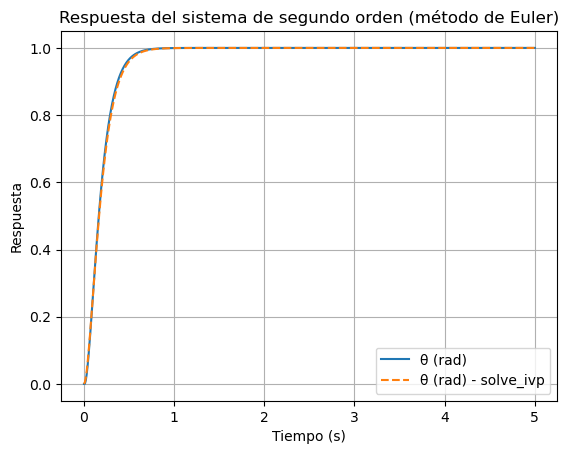

In [7]:
J = 0.01  # kg·m^2
B = 0.2   # N·m·s/rad
K = 1     # N·m/rad
# Condiciones iniciales
x0 = [0, 0]
# Intervalo de tiempo y paso
tspan = (0, 5)
h = 0.01
# Resolver usando método de Euler
sol = f_euler(f, tspan, x0, h)
sol2 = solve_ivp(f, tspan, x0, t_eval=sol.t)
# Graficar resultados
plt.figure()
plt.plot(sol.t, sol.y[0, :], label='θ (rad)')
plt.plot(sol2.t, sol2.y[0, :], label='θ (rad) - solve_ivp', linestyle='dashed')
plt.title('Respuesta del sistema de segundo orden (método de Euler)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.legend()
plt.grid()

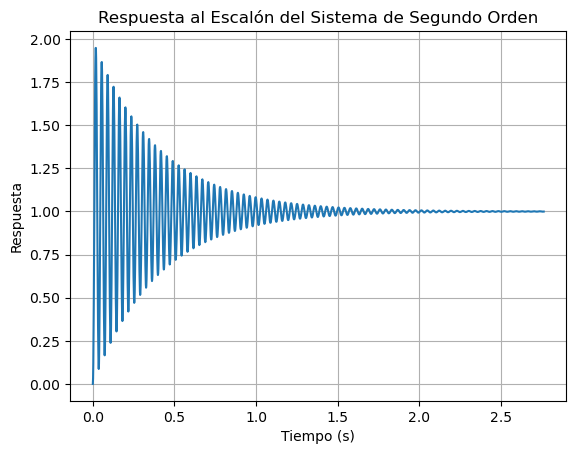

In [10]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
K = 3000
B  = 0.5
J = 0.1
G = ct.tf([K], [J, B, K])
G.poles()

# Respuesta al escalón
T, yout = ct.step_response(G)
plt.figure()
plt.plot(T, yout)
plt.title('Respuesta al Escalón del Sistema de Segundo Orden')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid()
# Análisis de la respuesta al escalón

In [11]:
G.poles()

array([-2.5+173.18703762j, -2.5-173.18703762j])